# Data Analysis

Once the data preparation stage was completed, the resulting five dataframes were used to complete data analysis. However, the data preparation stage raised several data quality issues which have potentially reduced the business value of the analysis. In particular, conclusions from geographic and demographic analysis may be incorrect given the underlying customer data issues; also using customer reviews is problematic given the different interpretations that appear to have been taken for the review score ranking direction. Nevertheless, some data analysis has been completed.

In summary, the themes analysed were:

- Customer Reviews
- Product Sales
- Geographic Impact



In [1]:
# Retrieve the completed working dataframes for analysis
%store -r sales_df stock_df customer_reviews_df customers_df states_df

# Libraries For file handling and dataframes
import os
import json
from IPython.display import display
import pandas as pd 

# Libraries for maths, plots
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Other Libraries
import math
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stuartgow/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Customer Reviews

All customer reviews consist of descriptive text and a score, it appears that the score is a ranking from poor to good (1 to 5). Looking at the customer ranking scores there was a very even distribution of the scores which is unexpected. To try to understand the reviews better, a sentiment analysis was completed on the descriptive text for all reviews and then used to generate a 1 to 5 sentiment ranking. 

The ranking produced from sentiment analysis were generally very positive which seems unusual; however, a manual examination of several reviews did support this as a very large number do have positive text. So this generated ranking was retained for comparisons.

The difference between customer rankings and sentiment rankings was then compared to get a sense of the accuracy of the customer rankings. The bar plot below  shows that nearly 50% of the 39,000 reviews had significantly different rankings and that the rankings given by customers were generally much more conservative than the sentiment expressed in the the actual text. A manual spot-check of several customer reviews was carried out to better understand this issue. The reason for the big difference is that a very signifiant number of customers have interpreted the ranking in the opposite way, ie good to bad (1 to 5).

In [11]:
 # Sentiment analysis of reviews

#import nltk
#nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#  Simple function to categorise sentiment to create a ranking score similar to customer reviews
def sentiment_categorise(sentiment):
    # Uses the sentiment compound score defined as +ve >= 0.05, -ve <=-0.5, neutral in between
    # Set the 1 to 5 score
    if sentiment <= -0.5:
        return 1
    elif sentiment <= -0.05:
        return 2
    elif sentiment < 0.05:
        return 3
    elif sentiment < 0.5:
        return 4
    else:
        return 5
    
# Obtain the sentiment, compound score (-1 to 1) for each review
temp_customer_reviews = customer_reviews_df.copy()
sentiment_compound_scores = [analyser.polarity_scores(review_text)['compound'] for review_text in temp_customer_reviews['review_text']]

# Classify the sentiments to align to the review score ranking 1 to 5 and put into the temporary DF
temp_customer_reviews['sentiment_review_score'] = [sentiment_categorise(x) for x in sentiment_compound_scores]
temp_customer_reviews['sentiment_compound_score'] = sentiment_compound_scores
temp_customer_reviews['review_score'] = temp_customer_reviews['review_score'].astype(int)



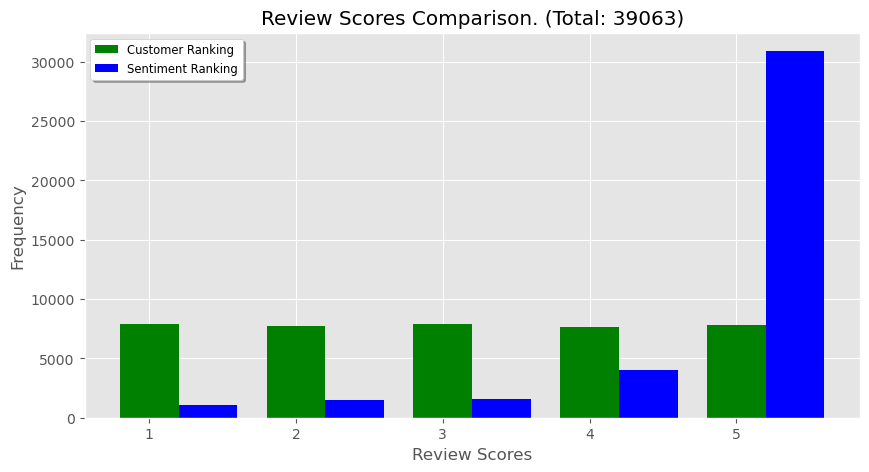

In [3]:
 # Compare the review rankings for customers compared to the sentiment analysis

rank_count_cust = temp_customer_reviews['review_score'].value_counts()
rank_count_sent = temp_customer_reviews['sentiment_review_score'].value_counts()
#display(rank_count_cust, rank_count_sent)

fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title(f'Review Scores Comparison. (Total: {len(temp_customer_reviews['review_score'])})')
ax.set_xlabel('Review Scores')
ax.set_ylabel('Frequency')
bar_width = 0.4

columnsC = rank_count_cust.index
columnsS = [x + bar_width for x in rank_count_sent.index]

barsC = ax.bar(columnsC, rank_count_cust, color='green', width=bar_width, label='Customer Ranking')
barsS = ax.bar(columnsS, rank_count_sent, color='blue', width=bar_width, label='Sentiment Ranking')
ax.legend(fontsize='small', loc='upper left', shadow=True, facecolor='white')
plt.show()

# Tidy Up
del rank_count_cust, rank_count_sent, columnsC, columnsS

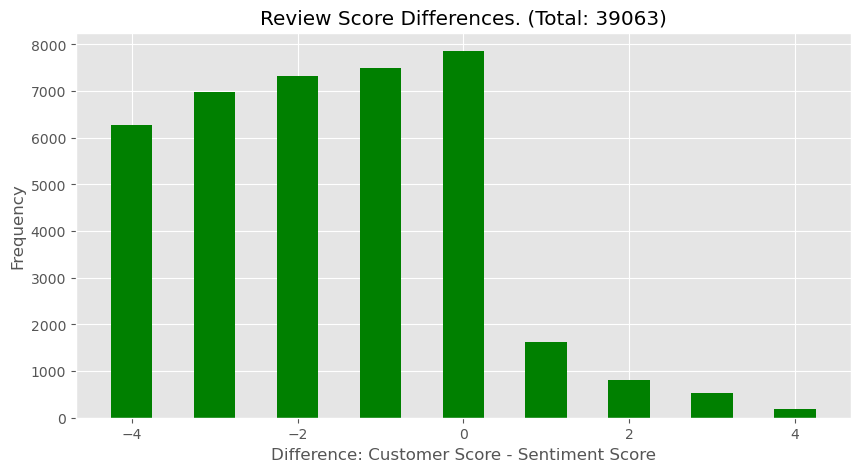

In [4]:
 # Compare the customer review rankings with the sentiment analysis
# Calculate the frequency of differences
score_differences = temp_customer_reviews['review_score'] - temp_customer_reviews['sentiment_review_score']
differences_frequency = score_differences.value_counts()
#display(differences_frequency)

# Plot the frequencies
fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title(f'Review Score Differences. (Total: {len(score_differences)})')
ax.set_xlabel('Difference: Customer Score - Sentiment Score')
ax.set_ylabel('Frequency')
bars = ax.bar(differences_frequency.index, differences_frequency, color='green', width=0.5)
plt.show()

# Tidy Up
del analyser, sentiment_compound_scores, score_differences, differences_frequency
# temp_customer_reviews, 

## Product Sales Analysis

The distribution of products sold was examined and a surprisingly large spread of sales revenue across the product range was identified. The vast majority of sales revenue is generated from products in the £20 to $4,500 price range, whereas the high-end and low-end products do not generate as significant a sales revenue.

***Product Sales Revenue***

The entire product range totals 6,110 items and generated a sales revenue of approximately $4,000k. Within this, 100 products generated $1,600k, or 40%, of the sales revenue. And over 2,000 products generated less than $150k sales revenue.

***Product Pricing***

Approximately $2,000k, 50% of sales revenue, is generated by the 200 highest priced products (all over $500 each); the majority of which is from products in the $1,500 to $4,500 price range. The majority of products (over 3,500) are in the $20 to $100 price range and generate approximately $1,250k sales revenue. The very lowest priced products, 1,200 items under $20, generate very little sales revenue.

Sales with no sale price: 95


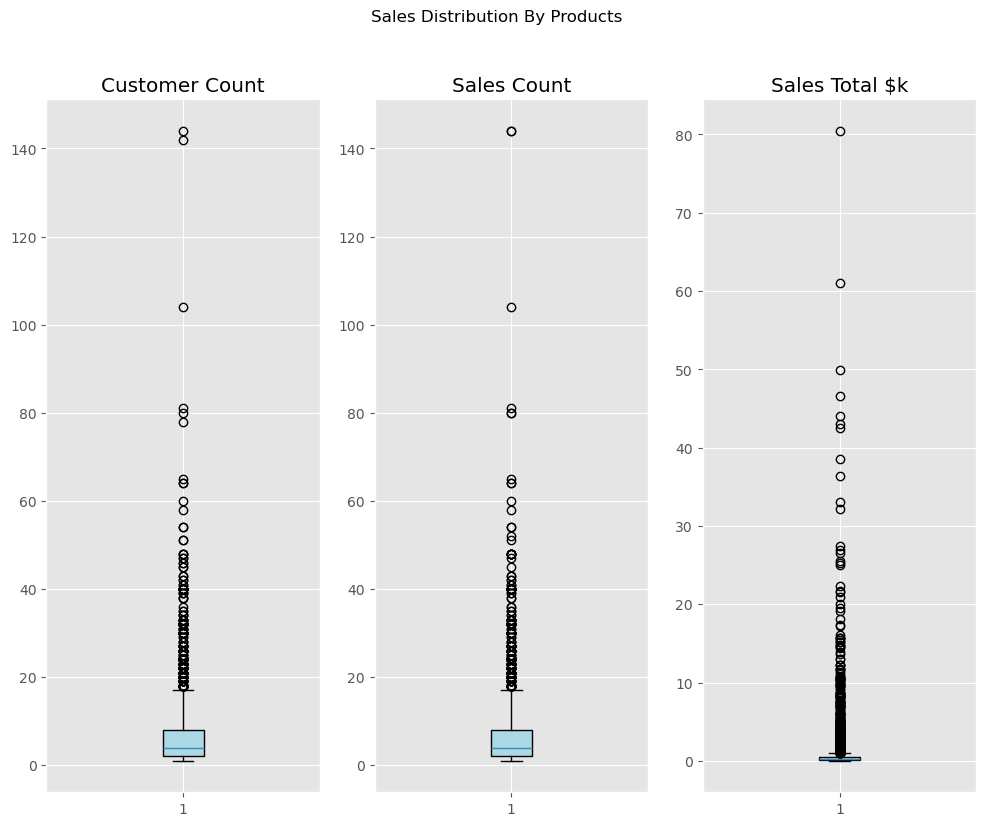

Top Five Products by Sales Value


,stock_name,sales_price,uniq_cust_count,sales_count,sales_total$k
36354,"GE Profile™ 30"" Built-In Double Wall Oven Self...",4023.510,20,20,80.4702
19259,LG ENERGY STAR® 30 cu. ft. Super Capacity 3-Do...,4356.100,14,14,60.9854
35750,Samsung ENERGY STAR® 26 cu. ft. 3-Door French ...,2270.705,22,22,49.9555
36007,GE® 4.8 DOE Cu. ft. Capacity RightHeight™ Desi...,1412.880,33,33,46.6250
10789,Samsung ENERGY STAR® 23 cu. ft. 4-Door French ...,3141.220,14,14,43.9771


Bottom Five Products by Sales Value


,stock_name,sales_price,uniq_cust_count,sales_count,sales_total$k
6848,Ambrielle® Bonded Hipster Panties,3.61,1,1,0.0036
15587,Marie Meili Mila Hipster Panties,4.82,1,1,0.0048
24296,Disney Collection Fauna Mini Plush,4.83,1,1,0.0048
38558,St. Eve Striped Hipster Panties,4.82,1,1,0.0048
13482,HS by Happy Socks™ Mens Striped Crew Socks,4.97,1,1,0.0050


Total sales value $k: 4035.37, from top 100: 1635.13, approx 40.52%
Total number of products: 6110


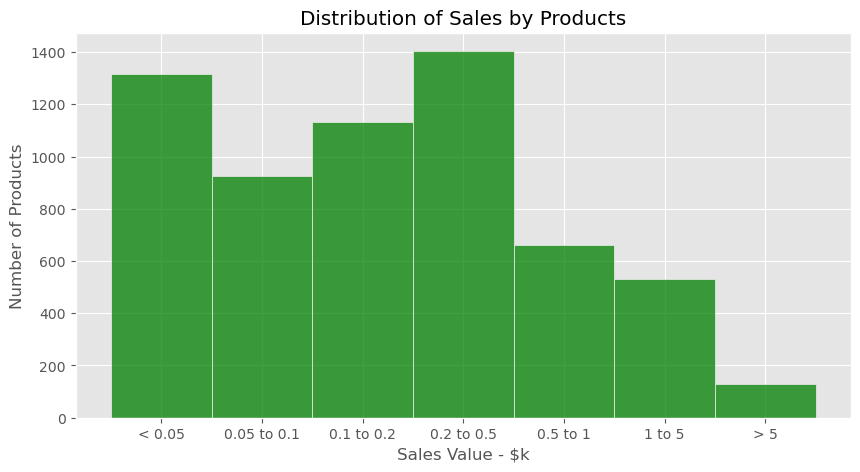

In [5]:
# Examine product sales

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats

# Create customer sales 
cust_sales = pd.merge(customer_reviews_df, customers_df, on='customer_id')
cust_sales = pd.merge(cust_sales, sales_df, on='uniq_id')
cust_sales_stock = pd.merge(cust_sales, stock_df, on='sku', how='left')

# Exclude without a list price
no_sale_price = len(cust_sales_stock[cust_sales_stock['sale_price'] <= 0])
print(f'Sales with no sale price: {no_sale_price}')
cust_sales_stock = cust_sales_stock[cust_sales_stock['sale_price'] > 0]

# Aggregate totals for each product the sales information 
stock_summary = cust_sales_stock[['sku', 'stock_name']].drop_duplicates()

groups = cust_sales_stock.groupby('sku')
stock_summary['sales_count'] = groups['sale_price'].transform('count')
stock_summary['sales_total$k'] = groups['sale_price'].transform('sum')
stock_summary['sales_total$k'] = (stock_summary['sales_total$k'] / 1000).round(4)
stock_summary['sales_price'] = groups['sale_price'].transform('mean')
stock_summary['uniq_cust_count'] = groups['customer_id'].transform('nunique')

# Box plot of the distribution for products
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize =(12, 9))
fig.suptitle('Sales Distribution By Products')

ax0.set_title('Customer Count')
ax1.set_title('Sales Count')
ax2.set_title('Sales Total $k')

box0 = ax0.boxplot(stock_summary['uniq_cust_count'], patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
box1 = ax1.boxplot(stock_summary['sales_count'], patch_artist=True)
for patch in box1['boxes']:
    patch.set(facecolor='lightblue')
box2 = ax2.boxplot(stock_summary['sales_total$k'], patch_artist=True)
for patch in box2['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# Examine top and bottom 5 products by sales value
top5 = stock_summary.nlargest(5, 'sales_total$k')
bottom5 = stock_summary.nsmallest(5, 'sales_total$k')

print('Top Five Products by Sales Value')
display(top5[['stock_name', 'sales_price', 'uniq_cust_count', 'sales_count', 'sales_total$k']])
print('Bottom Five Products by Sales Value')
display(bottom5[['stock_name', 'sales_price', 'uniq_cust_count', 'sales_count', 'sales_total$k']])

# Sales from top x
x = 100
largestX = stock_summary.nlargest(x, 'sales_total$k')
largestX_value = (largestX['sales_total$k'].sum()).round(2)
total_sales = (stock_summary['sales_total$k'].sum()).round(2)
percentage = ((largestX_value / total_sales) * 100).round(2)
total_products = len(stock_df)
print(f'Total sales value $k: {total_sales}, from top {x}: {largestX_value}, approx {percentage}%')
print(f'Total number of products: {total_products}')

# Visualise the Sales Value ranges
value_bins = [0, 0.05, 0.1, 0.2, 0.5, 1, 5, 500]
value_bins_labels = ['< 0.05', '0.05 to 0.1', '0.1 to 0.2', '0.2 to 0.5', '0.5 to 1', '1 to 5', '> 5']
stock_summary['sales_groups'] = pd.cut(stock_summary['sales_total$k'], bins=value_bins, 
                       labels=value_bins_labels, right=False)

fig, ax = plt.subplots(figsize =(10, 5))
sns.histplot(stock_summary['sales_groups'], bins=value_bins, kde=False, color = 'green')
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.title('Distribution of Sales by Products')
plt.xlabel('Sales Value - $k')
plt.ylabel('Number of Products')
plt.show()



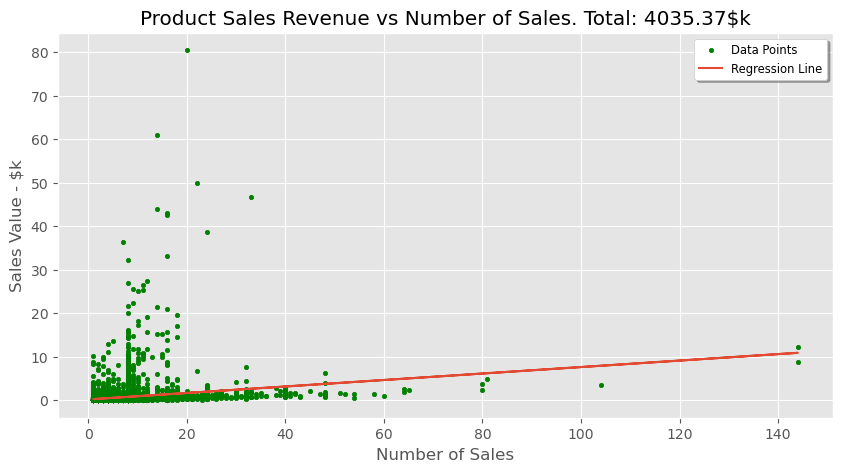

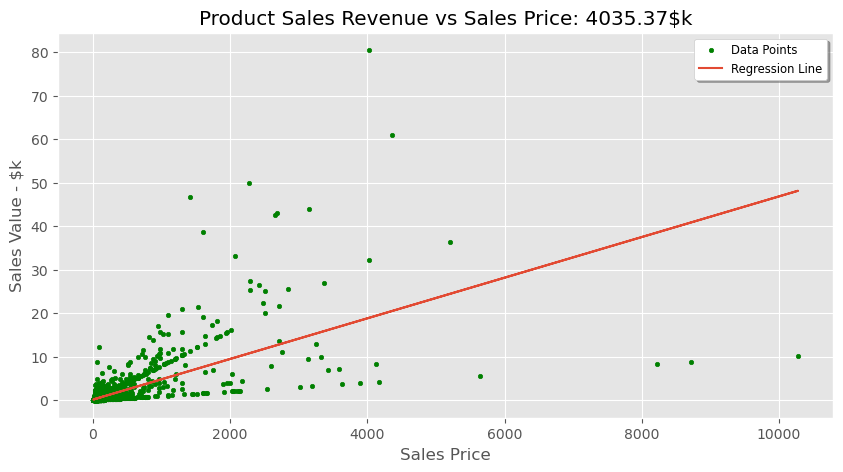

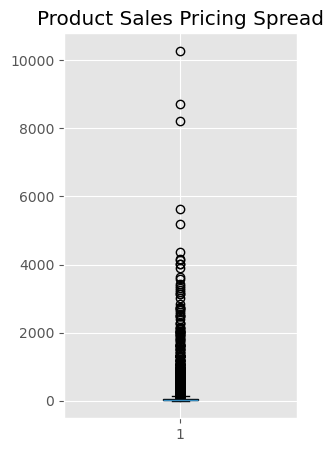

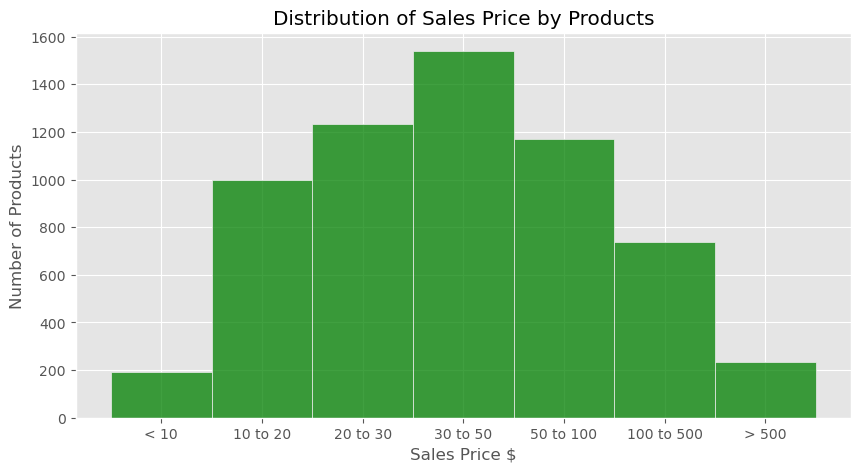

/var/folders/_3/08zshp4n3z1_glk6l5vgyqz40000gn/T/ipykernel_87432/3627445658.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = stock_summary.groupby('sales_price_bands')
/var/folders/_3/08zshp4n3z1_glk6l5vgyqz40000gn/T/ipykernel_87432/3627445658.py:62: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  bands_summary['sales_total$k'] = groups['sales_total$k'].transform(sum)


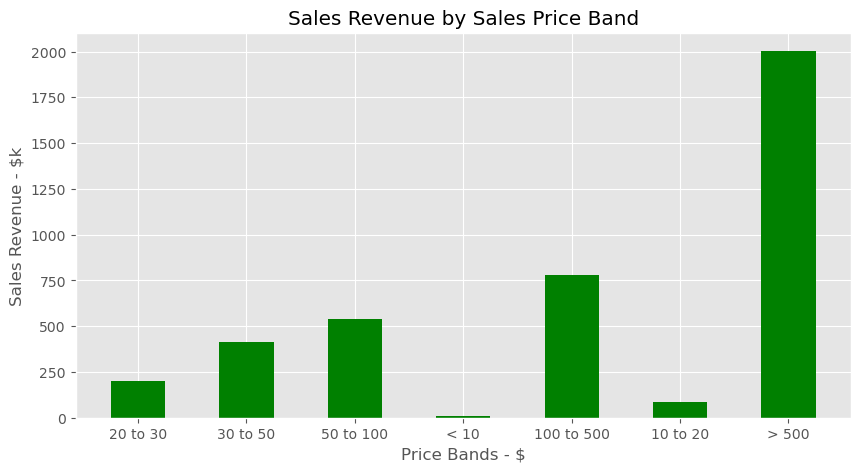

In [6]:
# Examine Product Pricing

# Identify where high sales value comes from?
# Is it sales volume or pricing

# Compare sales revenue with number of sales
x = stock_summary['sales_count']
y = stock_summary['sales_total$k']

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title(f'Product Sales Revenue vs Number of Sales. Total: {total_sales}$k')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Sales Value - $k')
ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')
plt.show()

# Compare sales revenue with sales price
x = stock_summary['sales_price']
y = stock_summary['sales_total$k']

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title(f'Product Sales Revenue vs Sales Price: {total_sales}$k')
ax.set_xlabel('Sales Price')
ax.set_ylabel('Sales Value - $k')
ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')
plt.show()

# Look at the spread of pricing
fig,ax0 = plt.subplots(figsize =(3, 5))
ax0.set_title('Product Sales Pricing Spread')
box0 = ax0.boxplot(stock_summary['sales_price'], patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# Look at the number of products across price bands
value_bins = [0, 10, 20, 30, 50, 100, 500, 500000]
value_bins_labels = ['< 10', '10 to 20', '20 to 30', '30 to 50', '50 to 100', '100 to 500', '> 500']
stock_summary['sales_price_bands'] = pd.cut(stock_summary['sales_price'], bins=value_bins, 
                       labels=value_bins_labels, right=False)

fig, ax = plt.subplots(figsize =(10, 5))
sns.histplot(stock_summary['sales_price_bands'], bins=value_bins, kde=False, color = 'green')
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.title('Distribution of Sales Price by Products')
plt.xlabel('Sales Price $')
plt.ylabel('Number of Products')
plt.show()


# Revenue by price band
bands_summary = stock_summary[['sales_price_bands']].drop_duplicates()
groups = stock_summary.groupby('sales_price_bands')
bands_summary['sales_total$k'] = groups['sales_total$k'].transform(sum)

fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title(f'Sales Revenue by Sales Price Band')
ax.set_xlabel('Price Bands - $')
ax.set_ylabel('Sales Revenue - $k')
bars = ax.bar(bands_summary['sales_price_bands'], bands_summary['sales_total$k'], color='green', width=0.5)
plt.show()


## Geographic Impact

The geographic distribution of sales across the US was examined. The results were very surprising and could either be due to very poor quality data and data collection or very unusual sales patterns.

***Customer Distribution***

The number of customers across states is very evenly spread, the interquartile range is approximately 80 to 95; this is surprising given the population range across all states is 300 to nearly 39 million.

***Sales Distribution***

The sales data was analysed in a variety of ways (box plot, scatter plot with regression line, top and bottom 5, a choropleth map) but all supported the following conclusions:

- The spread of the total sales count and the sales $ value is very small (when the population distribution is considered)
- For example the 4th highest sales are in the US Minor Outlying Islands which has a population of 300 but spending as much as Alabama which has a population of over 5 million
- And, the largest state, California, with a population of nearly 39 million has the lowest sales total

This is in contrast to the number of physical store per state which do correlate well with population size. So it does seem likely that there is a problem with the quality of the sales data collected. Before making any business recommendations, the data collection pipeline and sources should be investigated; or worst case the operational information systems that provided the source data.

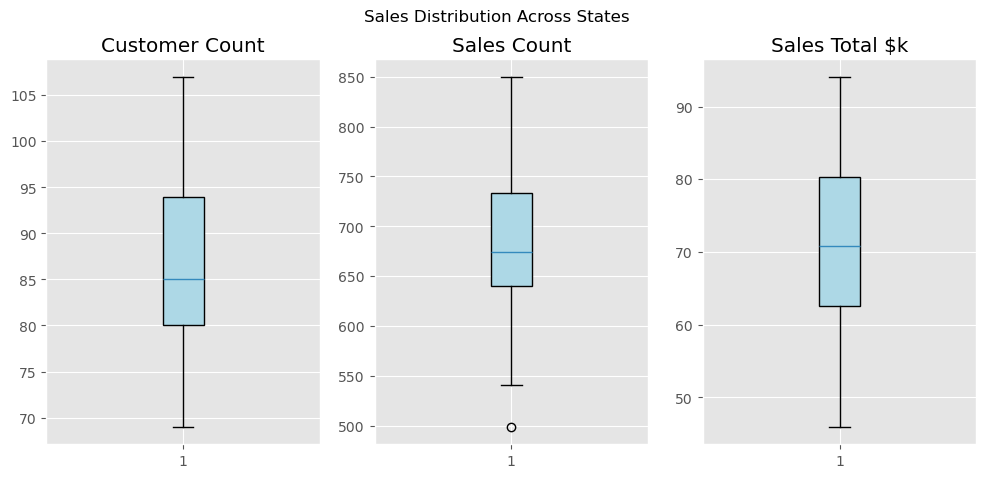

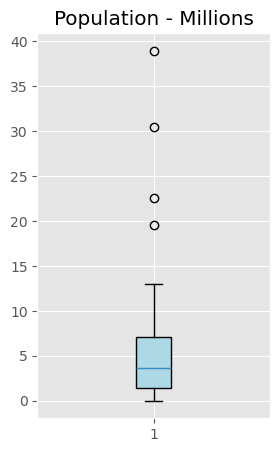

Top Five States by Sales Value


,state_name,population,customer_count,sales_count,sales_total$k
9,Florida,22610726,90,838,94.10
14,Indiana,6862199,83,715,93.25
34,North Dakota,783926,79,802,89.19
53,US Minor Outlying Islands,300,79,716,86.74
0,Alabama,5108468,96,774,86.14


Bottom Five States by Sales Value


,state_name,population,customer_count,sales_count,sales_total$k
4,California,38965193,79,546,45.95
16,Kansas,2940546,79,541,49.78
43,Texas,30503301,76,705,54.34
30,New Jersey,9290841,102,499,55.79
22,Michigan,10037261,69,630,55.90


In [7]:
 # Examine key customer and sales data by state

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create customer sales 
cust_sales = pd.merge(customer_reviews_df, customers_df, on='customer_id')
cust_sales = pd.merge(cust_sales, sales_df, on='uniq_id')

# Aggregate customer sales counts and total value
cust_summary = cust_sales[['customer_id', 'state_ISO']].drop_duplicates()
groups = cust_sales.groupby('customer_id')
cust_summary['sales_count'] = groups['uniq_id'].transform('count')
cust_summary['sales_total$k'] = groups['sale_price'].transform('sum')
cust_summary['sales_total$k'] = (cust_summary['sales_total$k'] / 1000).round(2)

# Aggregate the customer counts and sales totals by state
states_working = states_df.copy()
states_working['customer_count'] = customers_df.groupby('state_ISO')['state_ISO'].transform('count')
states_working.reset_index()
states_working['sales_count'] = cust_summary.groupby('state_ISO')['sales_count'].sum().reset_index()['sales_count']
states_working['sales_total$k'] = cust_summary.groupby('state_ISO')['sales_total$k'].sum().reset_index()['sales_total$k']

# Some analysis of these figures geographical
# Too many states for a meaningful bar plot for each states ...

# Distribution of sales across states, using box plots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize =(12, 5))
fig.suptitle('Sales Distribution Across States')

ax0.set_title('Customer Count')
ax1.set_title('Sales Count')
ax2.set_title('Sales Total $k')

box0 = ax0.boxplot(states_working['customer_count'], patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
box1 = ax1.boxplot(states_working['sales_count'], patch_artist=True)
for patch in box1['boxes']:
    patch.set(facecolor='lightblue')
box2 = ax2.boxplot(states_working['sales_total$k'], patch_artist=True)
for patch in box2['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# As comparison, the population distribution
fig,ax0 = plt.subplots(figsize =(3, 5))
ax0.set_title('Population - Millions')
box0 = ax0.boxplot(states_working['population']/1000000, patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# Examine top and bottom 5 states by sales value
top5 = states_working.nlargest(5, 'sales_total$k')
bottom5 = states_working.nsmallest(5, 'sales_total$k')

print('Top Five States by Sales Value')
display(top5[['state_name', 'population', 'customer_count', 'sales_count', 'sales_total$k']])
print('Bottom Five States by Sales Value')
display(bottom5[['state_name', 'population', 'customer_count', 'sales_count', 'sales_total$k']])


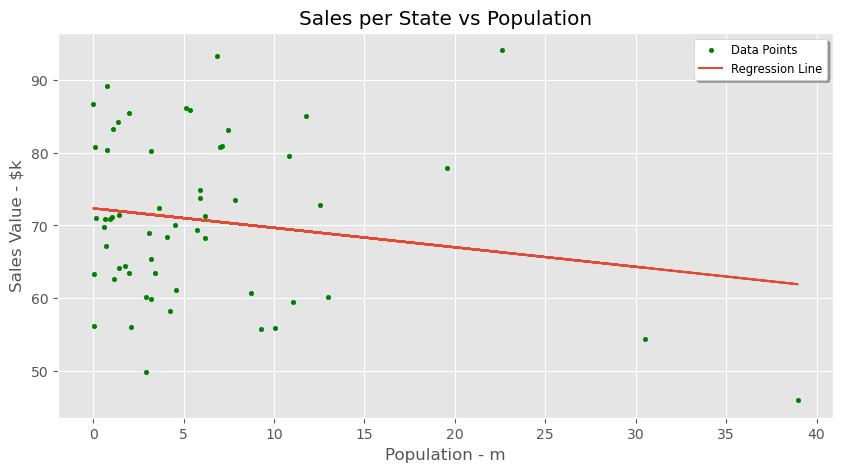

In [8]:
# Compare the sales value per state against the population
# Scatter plot and regression line

import scipy.stats

x = states_working['population'] / 1000000
y = states_working['sales_total$k']

# Calculate the regression line
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Scatter plot with fir line
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title('Sales per State vs Population')
ax.set_xlabel('Population - m')
ax.set_ylabel('Sales Value - $k')

ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')

plt.show()


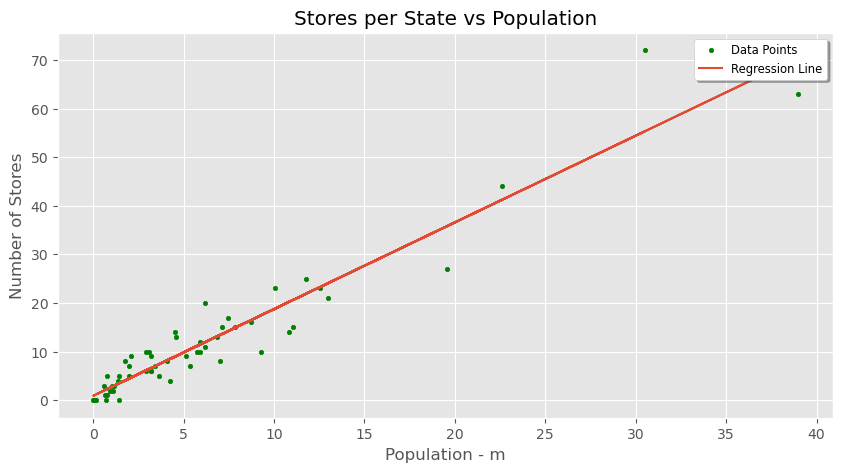

In [9]:
 # Sanity check of physical stores per state against the population
# Scatter plot and regression line

import scipy.stats

x = states_working['population'] / 1000000
y = states_working['stores_total']

# Calculate the regression line
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Scatter plot with fir line
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title('Stores per State vs Population')
ax.set_xlabel('Population - m')
ax.set_ylabel('Number of Stores')

ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')

plt.show()

In [10]:
# Map plot of sales totals per state
import plotly.express as px

fig = px.choropleth(states_working, locations='state_ISO', locationmode='USA-states', color='sales_total$k',          # Column to color by
        color_continuous_scale='Blues', scope='usa', title='Sales Value $k by State')

fig.show()


![Map](resources/usstates.png)